# Chapter 1: Define some datasets
This chapter aims to produce and define some test dataset to experiments with different Bayesian techniques.

In particular, we aim to define a few data tests of values from $\mathbb{R}^n \rightarrow \mathbb{R}$ (Regression) and $\mathbb{R}^n \rightarrow \mathcal{K}$ (Classification) that are corrupted by different sources of uncertainty (Aleatoric and/or Epistemic).

In [1]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

path_pardir = Path(os.getcwd()).parent
path_data = os.path.join(path_pardir, 'Data')

# Check and generate the data folder
if not os.path.isdir(path_data):
    os.mkdir(path_data)

## S-1.1: An "almost" linear relationship [Regression]
The first dataset is an elementary linear relationship $\mathcal{R}: \mathbb{R} \rightarrow \mathbb{R}$ : $\mathcal{R}(x) = 2x+7$.

<Axes: xlabel='x_range', ylabel='y_range'>

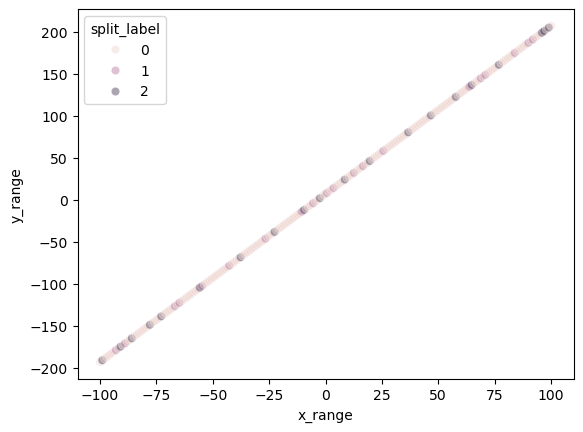

In [2]:
# Linear dataset
dataset_size = 200

x_range = np.linspace(-100,100,dataset_size)
y_range = 2*x_range+7

# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.seed(1902) # Fix random seed for reorder
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Define the dataframe and save it
df_linear = pd.DataFrame({"x_range":x_range,"y_range":y_range,"split_label":split_label})
path_save = os.path.join(path_data, "df_linear.csv")
df_linear.to_csv(path_save, index = False)
                         
# Scatter plot
sns.scatterplot(data=df_linear, x="x_range", y="y_range", hue="split_label", alpha = 0.4)

The second version of the dataset is the same linear relationship $\mathcal{R}: \mathbb{R} \rightarrow \mathbb{R}$ : $\mathcal{R}(x) = 2x+7+\varepsilon_A$ with the addition of homoscedastic perturbation $\varepsilon_A$. This is an addition of some Aleatoric uncertainty to the problem.

<Axes: xlabel='x_range', ylabel='y_range'>

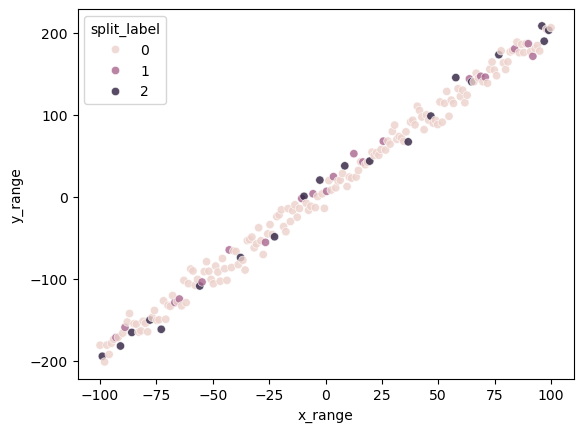

In [3]:
# Linear dataset
dataset_size = 200
x_range = np.linspace(-100,100,dataset_size)
y_range = 2*x_range+7+np.random.randn(x_range.shape[0]) * 10


# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.seed(1902) # Fix random seed for reorder
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Define the dataframe and save it
df_linear = pd.DataFrame({"x_range":x_range,"y_range":y_range,"split_label":split_label})
path_save = os.path.join(path_data, "df_linear_homoscedastic_aleatoric.csv")
df_linear.to_csv(path_save, index = False)
                         
# Scatter plot
sns.scatterplot(data=df_linear, x="x_range", y="y_range", hue="split_label", alpha = 0.8)

The third version of the dataset is the same linear relationship $\mathcal{R}: \mathbb{R} \rightarrow \mathbb{R}$ : $\mathcal{R}(x) = 2x+7+\varepsilon_A(x)$ with the addition of heteroscedastic perturbation $\varepsilon_A(x)$. This is an addition of some Aleatoric uncertainty to the problem.

<Axes: xlabel='x_range', ylabel='y_range'>

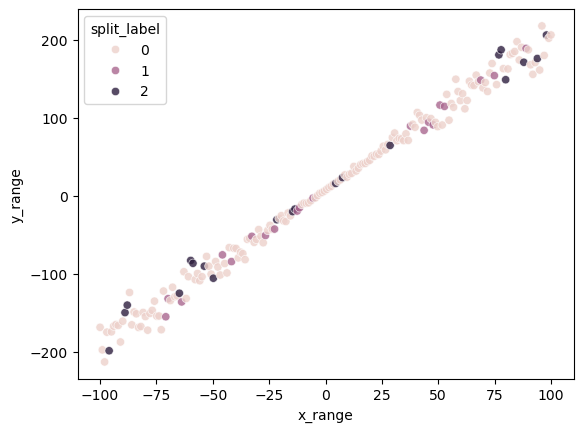

In [4]:
# Linear dataset
dataset_size = 200
x_range = np.linspace(-100,100,dataset_size)
y_range = 2*x_range+7+np.random.randn(x_range.shape[0])*abs(x_range)/5


# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Define the dataframe and save it
df_linear = pd.DataFrame({"x_range":x_range,"y_range":y_range,"split_label":split_label})
path_save = os.path.join(path_data, "df_linear_heteroscedastic_aleatoric.csv")
df_linear.to_csv(path_save, index = False)
                         
# Scatter plot
sns.scatterplot(data=df_linear, x="x_range", y="y_range", hue="split_label", alpha = 0.8)

## S-1.2: A non-linear relationship [Regression]
The second data set has the same (uncertainty) characteristics as the previous one, but is based on a non-linear relationship between input and output.
The relationship is defined as $\mathcal{R}: \mathbb{R} \rightarrow \mathbb{R}$ : $\mathcal{R}(x) = \sin\left(\frac{2\pi}{100}x\right)-\frac{1}{5000}x^2$

<Axes: xlabel='x_range', ylabel='y_range'>

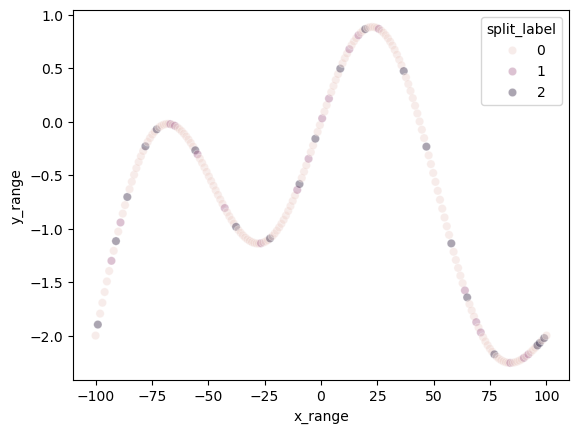

In [5]:
# Non linear dataset
dataset_size = 200
x_range = np.linspace(-100,100,dataset_size)
y_range = np.sin(2*np.pi*x_range/100)-x_range**2/5000 


# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.seed(1902) # Fix random seed for reorder
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Define the dataframe and save it
df_linear = pd.DataFrame({"x_range":x_range,"y_range":y_range,"split_label":split_label})
path_save = os.path.join(path_data, "df_nonlinear.csv")
df_linear.to_csv(path_save, index = False)
                         
# Scatter plot
sns.scatterplot(data=df_linear, x="x_range", y="y_range", hue="split_label", alpha = 0.4)

The second version is defined as $\mathcal{R}: \mathbb{R} \rightarrow \mathbb{R}$ : $\mathcal{R}(x) = \sin\left(\frac{2\pi}{100}x\right)-\frac{1}{5000}x^2+\varepsilon_A$ with the addition of homoscedastic perturbation $\varepsilon_A$. This is an addition of some Aleatoric uncertainty to the problem.

<Axes: xlabel='x_range', ylabel='y_range'>

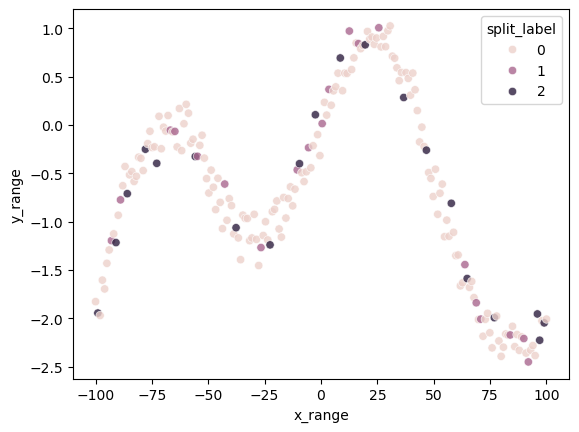

In [6]:
# Non linear dataset
dataset_size = 200
x_range = np.linspace(-100,100,dataset_size)
y_range = np.sin(2*np.pi*x_range/100)-x_range**2/5000 + np.random.randn(x_range.shape[0])/7


# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.seed(1902) # Fix random seed for reorder
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Define the dataframe and save it
df_linear = pd.DataFrame({"x_range":x_range,"y_range":y_range,"split_label":split_label})
path_save = os.path.join(path_data, "df_nonlinear_homoscedastic_aleatoric.csv")
df_linear.to_csv(path_save, index = False)
                         
# Scatter plot
sns.scatterplot(data=df_linear, x="x_range", y="y_range", hue="split_label", alpha = 0.8)

The second version is defined as $\mathcal{R}: \mathbb{R} \rightarrow \mathbb{R}$ : $\mathcal{R}(x) = \sin\left(\frac{2\pi}{100}x\right)-\frac{1}{5000}x^2+\varepsilon_A(x)$ with the addition of heteroscedastic perturbation $\varepsilon_A(x)$. This is an addition of some Aleatoric uncertainty to the problem.

<Axes: xlabel='x_range', ylabel='y_range'>

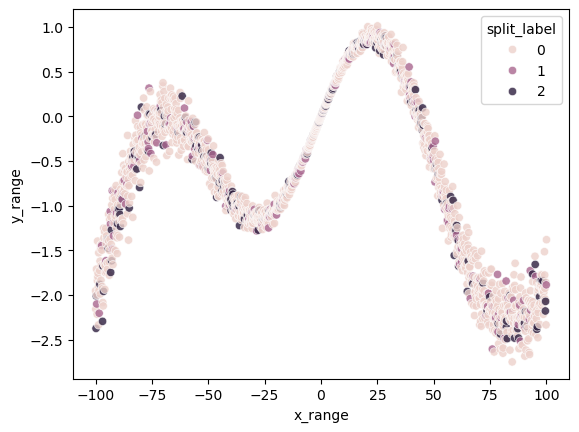

In [10]:
# Non linear dataset
dataset_size = 2000
x_range = np.linspace(-100,100,dataset_size)
y_range = np.sin(2*np.pi*x_range/100)-x_range**2/5000 + +np.random.randn(x_range.shape[0])*x_range/400

# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.seed(1902) # Fix random seed for reorder
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Define the dataframe and save it
df_linear = pd.DataFrame({"x_range":x_range,"y_range":y_range,"split_label":split_label})
path_save = os.path.join(path_data, "df_nonlinear_heteroscedastic_aleatoric.csv")
df_linear.to_csv(path_save, index = False)
                         
# Scatter plot
sns.scatterplot(data=df_linear, x="x_range", y="y_range", hue="split_label", alpha = 0.8)

## S-1.3: A multivariate and non-linear relationship [Regression]
We want to define a relationship that takes three independent variables $(x_1, x_2, x_3)$ as input and provides a complex, non-linear output for regression.

In [8]:
# Non linear dataset
dataset_size = 200
x1_range = np.linspace(-100,100,dataset_size)
x2_range = np.linspace(0,500,dataset_size)
x3_range = np.linspace(-10,10,dataset_size)

y_range = np.sin(2*np.pi*x1_range/100)-x1_range**2/5000 

# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.seed(1902) # Fix random seed for reorder
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Define the dataframe and save it
df_linear = pd.DataFrame({"x1_range":x1_range, "x2_range":x2_range, "x3_range":x3_range, "y_range":y_range,"split_label":split_label})
path_save = os.path.join(path_data, "df_multivariate_nonlinear.csv")
df_linear.to_csv(path_save, index = False)

## S-1.4: A multivariate and classification task [Classification]
We want to define a dataset for 2D classification task (with some Out-of-distribution elements).
First we define the real relationship (0 if $y<\mathcal{R}(x) = \sin\left(\frac{2\pi}{100}x\right)-\frac{1}{5000}x^2$) and then we add some OOD top right in the graph.

<Axes: xlabel='x_range', ylabel='y_range'>

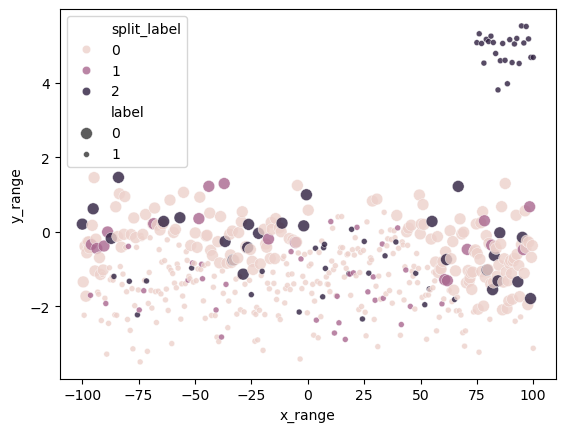

In [9]:
dataset_size = 500
x_range = np.linspace(-100,100,dataset_size)
y_range = np.random.randn(x_range.shape[0])-1

label = [1 if y_range[i]<np.sin(2*np.pi*x_range[i]/100)-x_range[i]**2/5000  else 0 for i in range(len(x_range))]

# Define a random split among dataset values (80% Training 0, 10% Validation 1, 10% Test 2)
split_label = [0]*int(dataset_size*80/100)+[1]*int(dataset_size*10/100)+[2]*int(dataset_size*10/100)
np.random.seed(1902) # Fix random seed for reorder
np.random.shuffle(split_label) # Reorder split_label to spread the split labels

# Add some OOD:
x_additional = np.linspace(75,100,int(dataset_size/20))
y_additional = np.random.randn(x_additional.shape[0])/2+5

# Append:
x_range = np.append(x_range, x_additional)
y_range = np.append(y_range, y_additional)
split_label = np.append(split_label, [2]*int(dataset_size/20))
label = np.append(label, [1]*int(dataset_size/20))

# Define the dataframe and save it
df_linear = pd.DataFrame({"x_range":x_range,"y_range":y_range,"split_label":split_label, "label": label})
path_save = os.path.join(path_data, "df_classification.csv")
df_linear.to_csv(path_save, index = False)
                         
# Scatter plot
sns.scatterplot(data=df_linear, x="x_range", y="y_range", hue="split_label", size = "label", alpha = 0.8)
